In [3]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

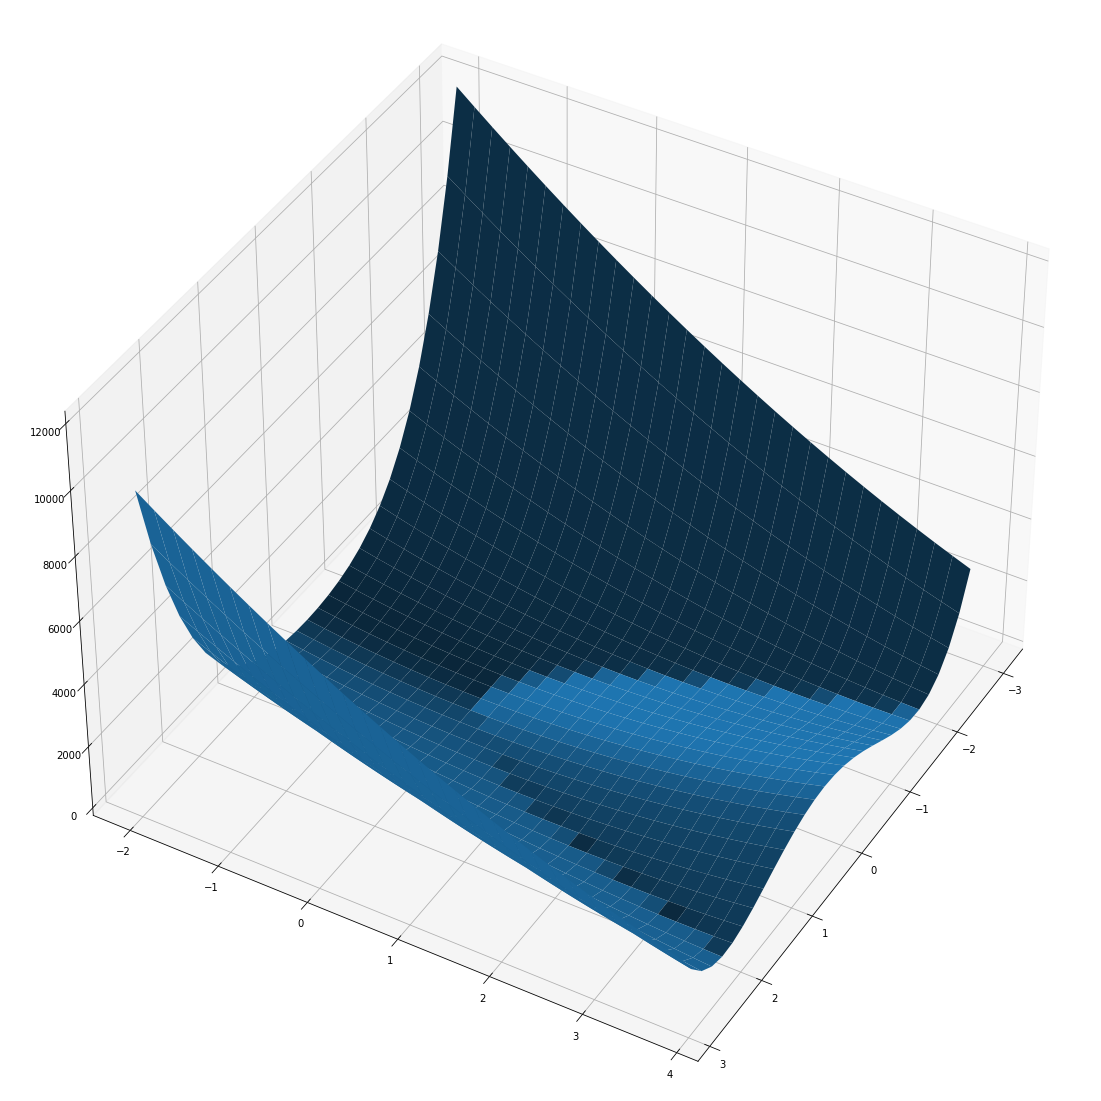

In [4]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 20])
ax = graph.add_subplot(projection='3d')
ax.view_init(40, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

In [5]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1. 1. 1. 1. 1.]
[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [6]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(np.round(result_point.x,3))

[0.939 0.882 0.776 0.603 0.361]


# Метод лагранжа

Представьте, что вы решаете задачу классификации методом опорных векторов и хотите оценить расстояние от объекта до разделяющей прямой с помощью метода Лагранжа. Если объект имеет координаты(2,1), а прямая задана уравнением x + y = 1 , то каким будет квадрат расстояния от этого объекта до прямой?

In [7]:
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w, dict=True)
sols

[{w: 0.707106781186548, x: 1.00000000000000, y: 0.0}]

In [8]:
x,y,z, w=symbols(' x y z w' )
v = x * y * z - 1
f = 2*x*y + 2*x*z + 2*y*z + w*(x * y * z - 1)
fx = f.diff(x)
fy = f.diff(y)
fz = f.diff(z)
fw = f.diff(w)
sols = solve([fx,fy,fz,fw], x, y, z, w, dict=True)
sols

[{w: -4, x: 1, y: 1, z: 1},
 {w: 2 - 2*sqrt(3)*I,
  x: -1/2 - sqrt(3)*I/2,
  y: -1/2 - sqrt(3)*I/2,
  z: -1/2 - sqrt(3)*I/2},
 {w: 2 + 2*sqrt(3)*I,
  x: -1/2 + sqrt(3)*I/2,
  y: -1/2 + sqrt(3)*I/2,
  z: -1/2 + sqrt(3)*I/2}]

In [9]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


In [10]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f,7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

simple gradient descend

In [11]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)
def grad(x,y, a=1,b=1):
    return np.array([2*a*x, 2*b*y])
def gradient_descend(grad: Function, step=0.2, num_steps=30):
    lst = list()
    x = np.random.uniform(0,3,size=2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step* grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [41]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6, rstride=1, cstride=1)
    ax.contour(x, y, z, 10, zdir='z', offset=0)
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

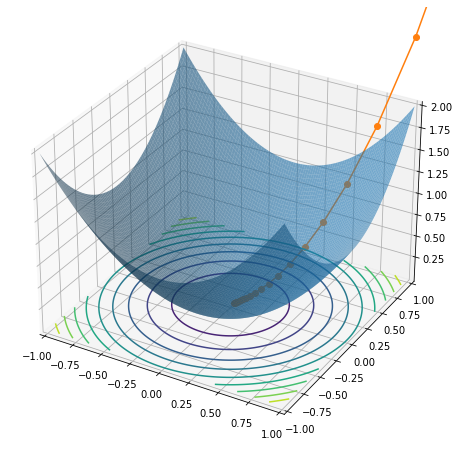

In [43]:
trace = gradient_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

C:\Users\mblyz\AppData\Local\Temp\ipykernel_4912\2888114963.py:6: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, Z, 10, linewidth=3, cmap="autumn_r", linestyles="solid", offset=-1)
C:\Users\mblyz\AppData\Local\Temp\ipykernel_4912\2888114963.py:7: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")


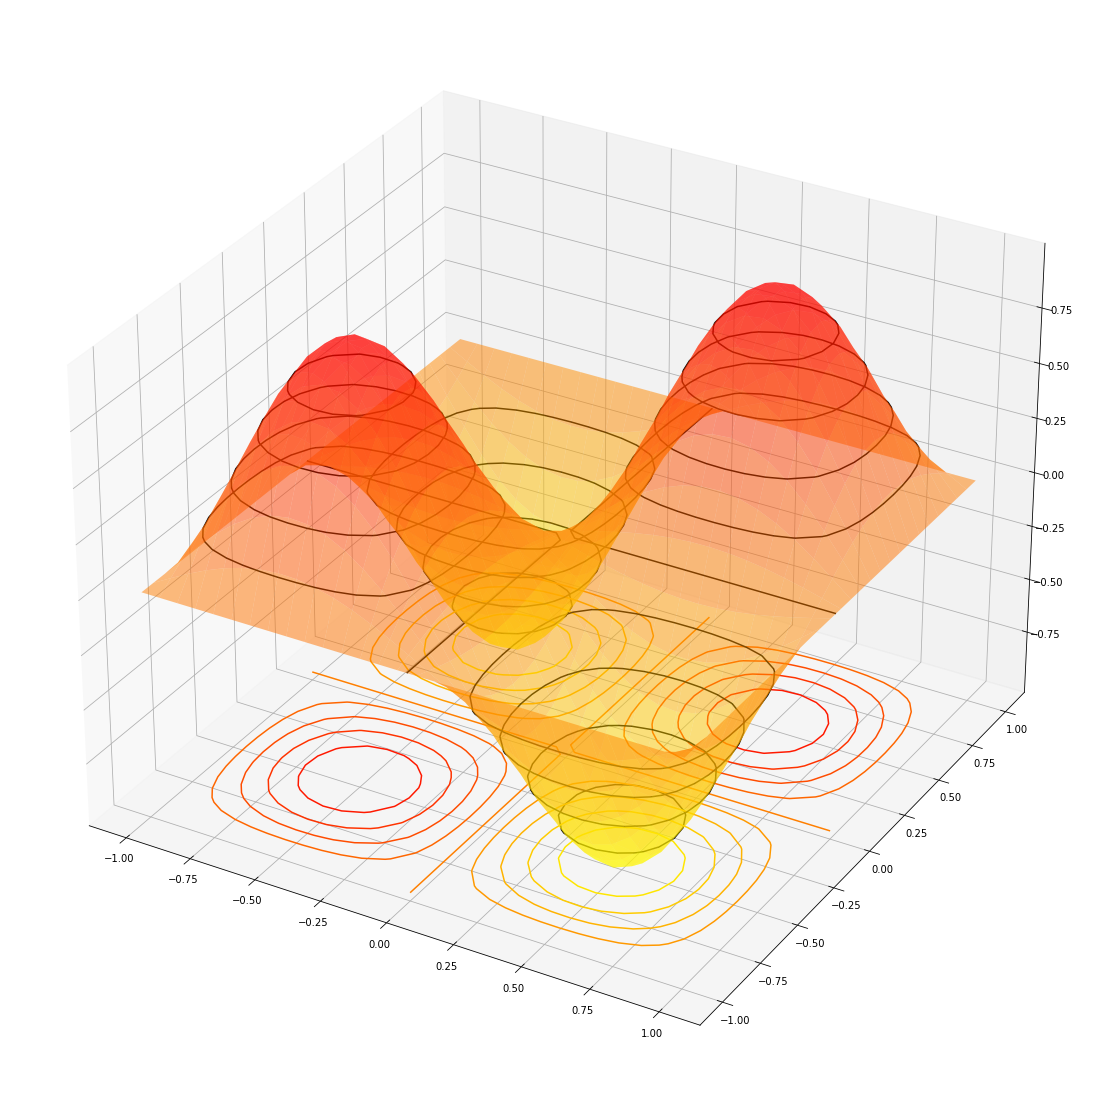

In [46]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1, alpha=0.5)
ax.contour(X, Y, Z, 10, linewidth=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.show()

# SGD


In [2]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df.drop(['depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)
df

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757
53936,0.72,Good,D,SI1,2757
53937,0.70,Very Good,D,SI1,2757
53938,0.86,Premium,H,SI2,2757


In [3]:
import pandas as pd
import numpy as np
df = pd.get_dummies(df, drop_first=True)    
df['carat'] = np.log(1+df['carat'])
df['price'] = np.log(1+df['price'])
X = df.drop(columns="price")
y = df["price"]

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import  SGDRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.33, random_state=42)

In [28]:
param_grid = {"loss": ["squared_error", "epsilon_insensitive"],
"penalty": ["elasticnet"],
"alpha": np.logspace(-3, 3, 10),
"l1_ratio": np.linspace(0, 1, 10),
"learning_rate": ["constant"],
"eta0": np.logspace(-4, -1, 4)}
gcv = GridSearchCV(SGDRegressor(random_state=42),cv=5,scoring='neg_mean_squared_error', param_grid=param_grid, n_jobs=-1)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'eta0': array([0.0001, 0.001 , 0.01  , 0.1   ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'learning_rate': ['constant'],
                         'loss': ['squared_error', 'epsilon_insensitive'],
                         'penalty': ['elasticnet']},
             scoring='neg_mean_squared_error')

In [29]:
gcv.best_params_

{'alpha': 0.001,
 'eta0': 0.01,
 'l1_ratio': 0.0,
 'learning_rate': 'constant',
 'loss': 'squared_error',
 'penalty': 'elasticnet'}

In [30]:
preds = gcv.best_estimator_.predict(X_test)
from sklearn.metrics import mean_squared_error
print(np.sum((preds - y_test)**2)/len(preds))
mean_squared_error(preds, y_test)

0.04454389811354121


0.04454389811354121

In [34]:
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
def nonlin(x,deriv=False):
    if(deriv==True):
        return f(x)*(1-f(x))
    return 1/(1+np.exp(-x))
# выходные данные            
y = np.array([[0,0,1,1]]).T
# сделаем случайные числа более определёнными
np.random.seed(1)

# инициализируем веса случайным образом со средним 0
syn0 = 2*np.random.random((3,1)) - 1
syn0

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [42]:
l0 = X
l1 = nonlin(np.dot(l0,syn0))
l1

array([[0.2689864 ],
       [0.36375058],
       [0.23762817],
       [0.3262757 ]])